<a href="https://colab.research.google.com/github/raj-hero/UGProject/blob/main/arima_me_maxmin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_csv('load.csv')

In [ ]:
df['Datetime'] = pd.to_datetime(df['datetime'])
df = df.set_index(['Datetime'])
del df['datetime']
# df

In [ ]:
scaler = MinMaxScaler()
# model=scaler.fit(data_f)
# df=model.transform(data_f)
df[['temp_2M', 'humidity_2M', 'precipitation_2M', 'wind_speed_2M', 'holiday','net_demand']]=scaler.fit_transform(df[['temp_2M', 'humidity_2M', 'precipitation_2M', 'wind_speed_2M', 'holiday','net_demand']])
# df

In [ ]:
X = df[['temp_2M', 'humidity_2M', 'precipitation_2M', 'wind_speed_2M', 'holiday']]
y = df['net_demand']

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split

In [ ]:
# Split data into training and testing sets
train_size = int(len(df) * 0.8)
train_X, test_X = X[:train_size], X[train_size:]
train_y, test_y = y[:train_size], y[train_size:]

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf


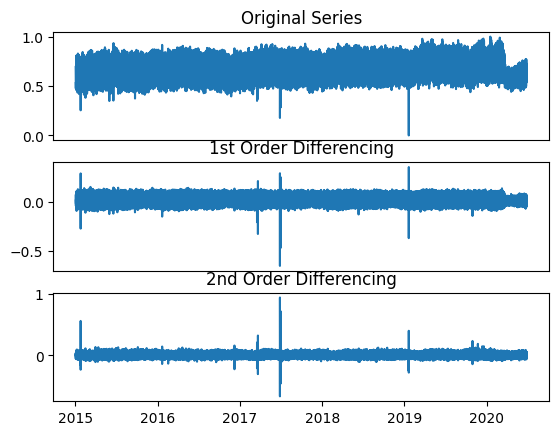

In [ ]:
# Original Series
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(y); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
# 1st Differencing
ax2.plot(y.diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
# 2nd Differencing
ax3.plot(y.diff().diff()); ax3.set_title('2nd Order Differencing')
plt.xlabel("Average Pulse")
plt.ylabel("Calorie Burnage")
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


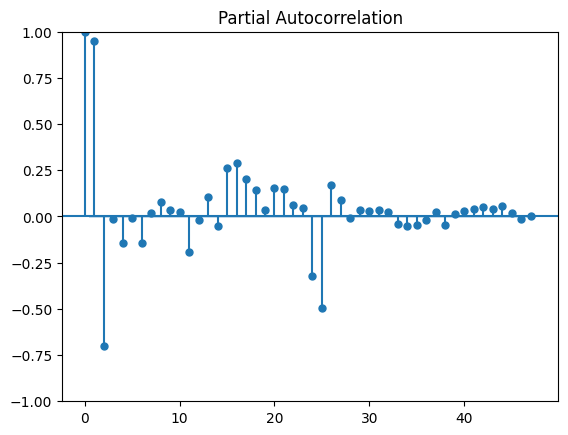

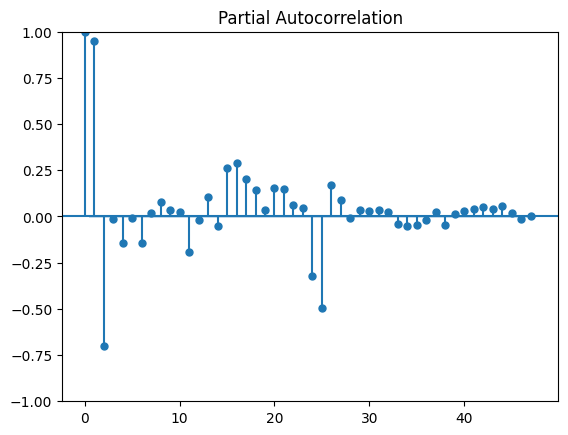

In [ ]:
# PACF 1 diff
plot_pacf(y)

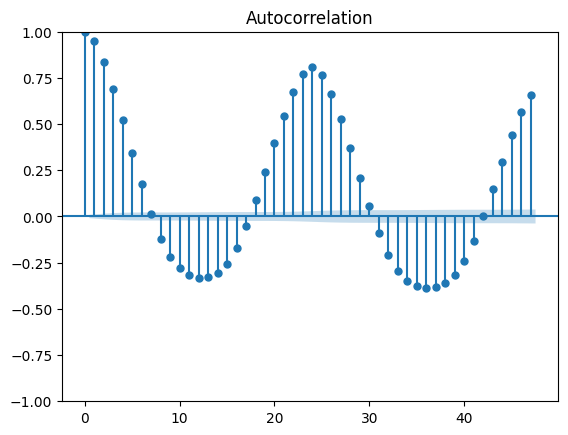

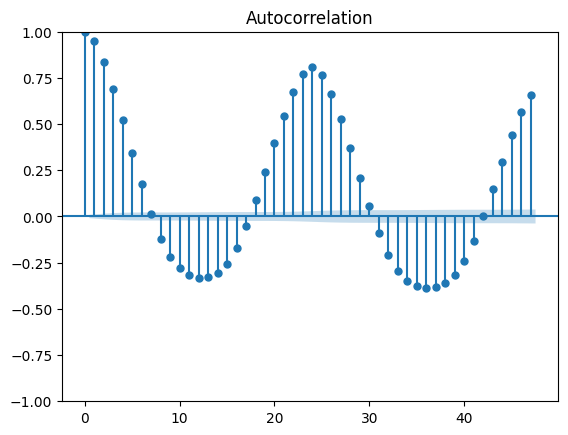

In [ ]:
# ACF 1 diff
plot_acf(y.dropna())

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(y)
print('p-value: %f' % result[1])

p-value: 0.000000


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


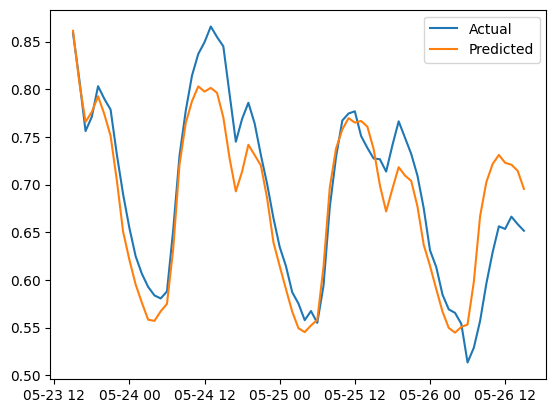

In [ ]:
model = ARIMA(endog=train_y, exog=train_X, order=(24, 0, 24))
model_fit = model.fit()
# Make predictions
predictions = model_fit.predict(start=len(train_y),
                                end=len(train_y)+len(test_y)-1, exog=test_X)
# Plot predicted vs actual values
plt.plot(test_y[0:73], label='Actual')
plt.plot(predictions[0:73], label='Predicted')
plt.legend()
plt.xlabel("Average Pulse")
plt.ylabel("Calorie Burnage")
plt.show()

In [ ]:
# Calculate the absolute errors
errors = abs(predictions - test_y)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_y)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.08
Accuracy: 88.12 %.


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


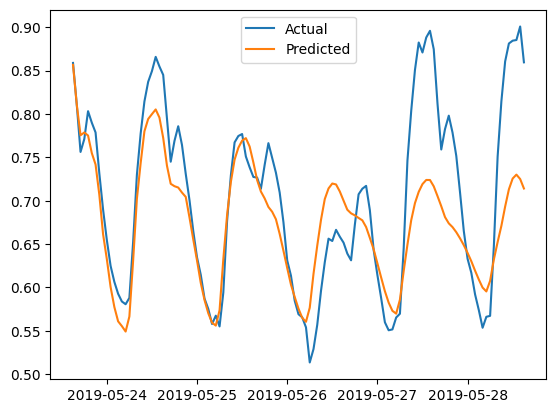

In [ ]:
model = ARIMA(endog=train_y, exog=train_X, order=(24, 0, 0))
model_fit = model.fit()
# Make predictions
predictions = model_fit.predict(start=len(train_y), end=len(train_y)+len(test_y)-1, exog=test_X)
# Plot predicted vs actual values
plt.plot(test_y[0:121], label='Actual')
plt.plot(predictions[0:121], label='Predicted')
plt.legend()
plt.xlabel("Average Pulse")
plt.ylabel("Calorie Burnage")
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

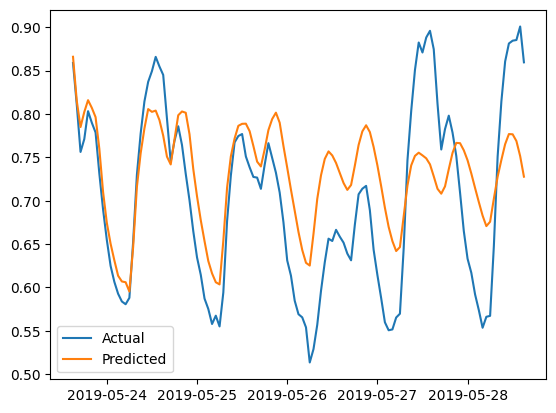

In [ ]:
model = ARIMA(endog=train_y, exog=train_X, order=(30, 0, 30))
model_fit = model.fit()
# Make predictions
predictions = model_fit.predict(start=len(train_y), end=len(train_y)+len(test_y)-1, exog=test_X)
# Plot predicted vs actual values
plt.plot(test_y[0:121], label='Actual')
plt.plot(predictions[0:121], label='Predicted')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  

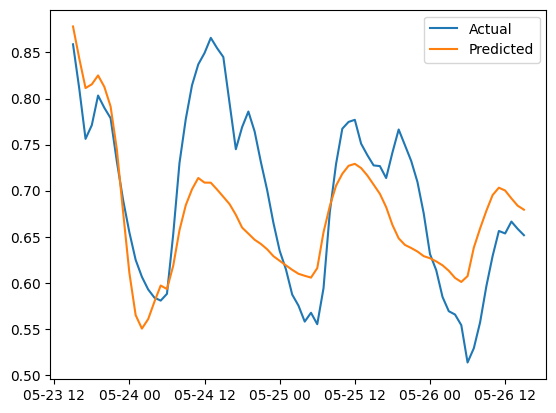

In [ ]:
model = ARIMA(endog=train_y, exog=train_X, order=(0, 0, 24))
model_fit = model.fit()
# Make predictions
predictions = model_fit.predict(start=len(train_y), end=len(train_y)+len(test_y)-1, exog=test_X)
# Plot predicted vs actual values
plt.plot(test_y[0:73], label='Actual')
plt.plot(predictions[0:73], label='Predicted')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


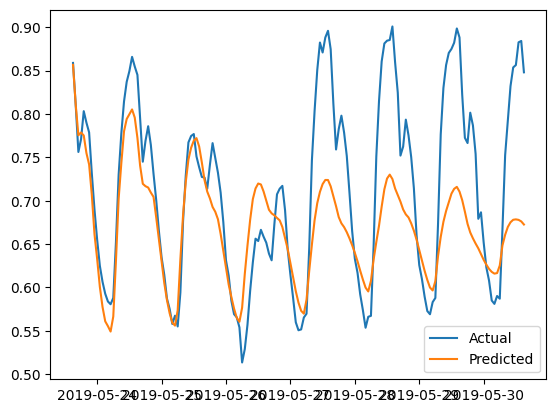

In [ ]:
model = ARIMA(endog=train_y, exog=train_X, order=(24, 0, 0))
model_fit = model.fit()
# Make predictions
predictions = model_fit.predict(start=len(train_y), end=len(train_y)+len(test_y)-1, exog=test_X)
# Plot predicted vs actual values
plt.plot(test_y[0:169], label='Actual')
plt.plot(predictions[0:169], label='Predicted')
plt.legend()
plt.xlabel("Average Pulse")
plt.ylabel("Calorie Burnage")
plt.show()